<a href="https://colab.research.google.com/github/lmcanavals/aai/blob/main/11_hill_climbing_nswap_random_restart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%file abz7
20 15
 2 24  3 12  9 17  4 27  0 21  6 25  8 27  7 26  1 30  5 31 11 18 14 16 13 39 10 19 12 26
 6 30  3 15 12 20 11 19  1 24 13 15 10 28  2 36  5 26  7 15  0 11  8 23 14 20  9 26  4 28
 6 35  0 22 13 23  7 32  2 20  3 12 12 19 10 23  9 17  1 14  5 16 11 29  8 16  4 22 14 22
 9 20  6 29  1 19  7 14 12 33  4 30  0 32  5 21 11 29 10 24 14 25  2 29  3 13  8 20 13 18
11 23 13 20  1 28  6 32  7 16  5 18  8 24  9 23  3 24 10 34  2 24  0 24 14 28 12 15  4 18
 8 24 11 19 14 21  1 33  7 34  6 35  5 40 10 36  3 23  2 26  4 15  9 28 13 38 12 13  0 25
13 27  3 30  6 21  8 19 12 12  4 27  2 39  9 13 14 12  5 36 10 21 11 17  1 29  0 17  7 33
 5 27  4 19  6 29  9 20  3 21 10 40  8 14 14 39 13 39  2 27  1 36 12 12 11 37  7 22  0 13
13 32 11 29  8 24  3 27  5 40  4 21  9 26  0 27 14 27  6 16  2 21 10 13  7 28 12 28  1 32
12 35  1 11  5 39 14 18  7 23  0 34  3 24 13 11  8 30 11 31  4 15 10 15  2 28  9 26  6 33
10 28  5 37 12 29  1 31  7 25  8 13 14 14  4 20  3 27  9 25 13 31 11 14  6 25  2 39  0 36
 0 22 11 25  5 28 13 35  4 31  8 21  9 20 14 19  2 29  7 32 10 18  1 18  3 11 12 17  6 15
12 39  5 32  2 36  8 14  3 28 13 37  0 38  6 20  7 19 11 12 14 22  1 36  4 15  9 32 10 16
 8 28  1 29 14 40 12 23  4 34  5 33  6 27 10 17  0 20  7 28 11 21  2 21 13 20  9 33  3 27
 9 21 14 34  3 30 12 38  0 11 11 16  2 14  5 14  1 34  8 33  4 23 13 40 10 12  6 23  7 27
 9 13 14 40  7 36  4 17  0 13  5 33  8 25 13 24 10 23  3 36  2 29  1 18 11 13  6 33 12 13
 3 25  5 15  2 28 12 40  7 39  1 31  8 35  6 31 11 36  4 12 10 33 14 19  9 16 13 27  0 21
12 22 10 14  0 12  2 20  5 12  1 18 11 17  8 39 14 31  3 31  7 32  9 20 13 29  4 13  6 26
 5 18 10 30  7 38 14 22 13 15 11 20  9 16  3 17  1 12  2 13 12 40  6 17  8 30  4 38  0 13
 9 31  8 39 12 27  1 14  5 33  3 31 11 22 13 36  0 16  7 11 14 14  4 29  6 28  2 22 10 17

Writing abz7


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def randRep(n, m):
    rep = [i for i in range(n)]*m
    pos = []
    random.shuffle(rep)
    rep = np.array(rep)
    for i in range(n):
        pos.append((rep == i).nonzero()[0].tolist())
    return rep, np.array(pos)

In [ ]:
rep, pos = randRep(4, 5)
print(rep)
print(pos)

[3 0 2 3 1 1 0 2 0 1 3 0 2 2 2 3 1 1 3 0]
[[ 1  6  8 11 19]
 [ 4  5  9 16 17]
 [ 2  7 12 13 14]
 [ 0  3 10 15 18]]


In [ ]:
def calcMakespan(rep, n, m, jobs):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    makespan = 0
    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
        mstart[midx] = max(mstart[midx], jend[e]) + time
        jend[e] = mstart[midx]
        if mstart[midx] > makespan:
            makespan = mstart[midx]

    return makespan

In [ ]:
def mkSolution(rep, n, m, jobs, makespan):
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    schedule = np.zeros((m*10, makespan))

    for e in rep:
        i = idxs[e]
        idxs[e] += 1
        midx = jobs[e, i, 0]
        time = jobs[e, i, 1]
        mstart[midx] = max(mstart[midx], jend[e])
        schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
        mstart[midx] += time
        jend[e] = mstart[midx]

    plt.subplots(figsize=(20, 10))
    plt.imshow(schedule)

In [ ]:
def nswap(rep, pos, n, m, debug=False):
    numswaps = 2
    while numswaps < n - 1:
        if random.randint(1, 2) == 1:
            break
        else:
            numswaps += 1
    if debug: print(numswaps)
    jobs = random.sample(range(n), numswaps)
    if debug: print(jobs)
    for k in range(numswaps - 1):
        i0 = random.randint(0, m-1)
        j0 = random.randint(0, m-1)
        i = pos[jobs[k], i0]
        j = pos[jobs[k+1], j0]
        if debug: print(i0, j0, i, j)
        rep[i], rep[j] = rep[j], rep[i]
        pos[jobs[k], i0], pos[jobs[k+1], j0] = pos[jobs[k+1], j0], pos[jobs[k], i0]

In [ ]:
import time


def hillClimbing(n, m, jobs, delay):
    bestSolution, pos = randRep(n, m)
    bestMakespan = calcMakespan(bestSolution, n, m, jobs)

    alltimeBestSolution = np.zeros_like(bestSolution, dtype=int)
    alltimeBestMakespan = bestMakespan

    copy = np.zeros((n*m), dtype=int)
    poscopy = np.zeros_like(pos, dtype=int)
    timesup = False
    start = time.time()
    iter = 0
    print(bestSolution, bestMakespan)
    progress = []
    L = 0
    numRandRestarts = 0
    while not timesup:
        iter += 1
        copy = bestSolution.copy()
        poscopy = pos.copy()
        L += 1
        if L >= 2**16:
            L = 0
            numRandRestarts += 1
            bestSolution, pos = randRep(n, m)
            bestMakespan = calcMakespan(bestSolution, n, m, jobs)
        else:
            nswap(bestSolution, pos, n, m)
        #    swap1(bestSolution)
        newMakespan = calcMakespan(bestSolution, n, m, jobs)
        if newMakespan < bestMakespan:
            bestMakespan = newMakespan
            if bestMakespan < alltimeBestMakespan:
                alltimeBestMakespan = bestMakespan
                alltimeBestSolution = bestSolution.copy()
        else:
            bestSolution = copy.copy()
            pos = poscopy.copy()
        if time.time() - start >= delay:
            timesup = True
        progress.append(alltimeBestMakespan)

    print(numRandRestarts)
    return alltimeBestSolution, alltimeBestMakespan, progress

[11  7  0 12  9  8 13 13 15 16  1 10  1  1 14 12  1  4  6  7 10  1  8  2
 14 15 14  3 15 18 17 16  7  7  5  4  6  5 14 10 10  3 14 12 16  0  9  5
 12  2  2  3 12 13  2  8 15  6 16 16 11 14  7 19  1  2  5 14 10  1 13 18
  2  6  1  4 16 19 10  9 17  1  8 17  8  5  2  9 15 12  3 18 17 16  3 19
  1 18 15  0 15 17  4  3  0  6 19 11 14 17  1 14  0  4 19  7  9 14 12  0
  5 16  7 13 19 13 13  1  7  3  1  5 17 12  2 11  5 15 17 16  8 11 13 17
 10 15 18  0 10  8 10 15 16 16  5 17  7  9  5 14  0 14  6 11 14  9 10  8
 13  4  4 13 15 11 18  6 18 11 16 11  1 15 11  6  9  3  6 16 14 14 16 12
 13  2  9 18  5  5  0 10 12 17 19  3  9  8 11  7 19  9 18  2 19  0  2  4
  0 11  3  6  4 13  8  4 10 18  0  2  2 12  6 18 10  8  8  9  3 19  7  5
  6 13  7  7 17 19 13 19  8 15  6  7 19 11  3  0  4 11  2  8  4 12 18 18
  3  3  2  5  3 15 18  8  4 17 15 12 12  6 17  4 16  4  0 19  7 19  9  9
 18 10 17  5 13  6  1 12  9  0 11 10] 1412
5


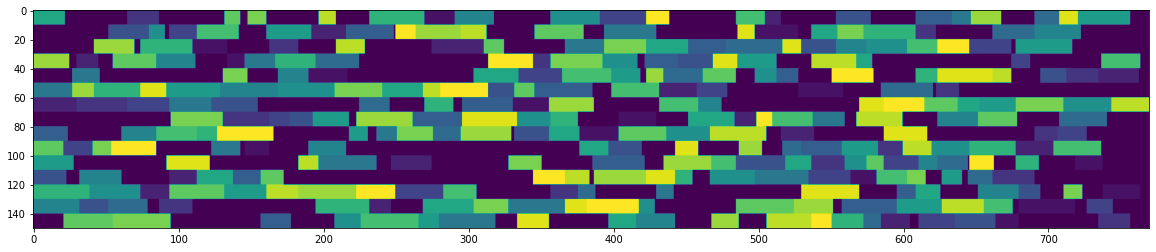

In [ ]:
with open('abz7') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1

    random.seed(1981)
    rep, makespan, data = hillClimbing(n, m, jobs, 180)
    mkSolution(rep, n, m, jobs, makespan)

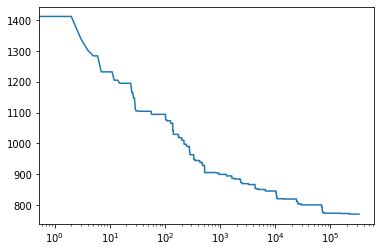

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data)
ax.set_xscale('log')
plt.show()

In [ ]:
makespan

770